In [15]:
import pandas as pd
from neuralNetworkFromScratch import NeuralNetworkFromScratch
import h5py
from PIL import Image
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [16]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

# Example 1: Simple binary classification

In [ ]:
data = load_wine()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=['class'])
df = pd.concat([features, target], axis=1)

# Dropping one class for binary classification
df = df[df['class'] != 2]
features = df.drop('class', axis=1)
target = df[['class']]

In [ ]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [ ]:
# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [ ]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 4, 2, 1], task='binary_classification', learning_rate=1e-1, n_epochs=10000, print_cost=True, lambd=0.7, initialization='He')

In [ ]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True)

In [ ]:
pred_train = model.predict(train_x, train_y)

In [4]:
pred = model.predict(test_x, test_y)

NameError: name 'model' is not defined

# Example 2: Image recognition

## 1. Imports

In [17]:
def load_data():
    train_dataset = h5py.File('../data/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('../data/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [18]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


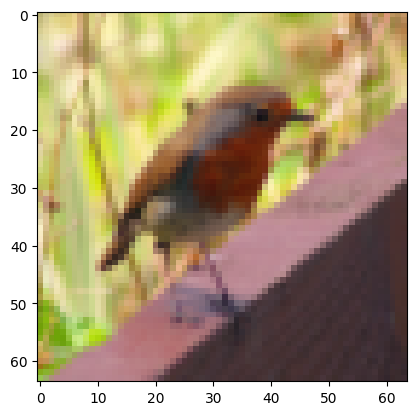

In [19]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

## 2. Preprocessing

In [20]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## 3. Training

In [21]:
model = NeuralNetworkFromScratch(layers_dims=[12288, 20, 7, 5, 1], task='binary_classification', learning_rate=0.0075, n_epochs=5000, print_cost=True, initialization='Xavier', lambd=None, keep_prob=0.8)

Cost after iteration 0: 0.7758239515640514
Cost after iteration 100: 0.6761014334018488
Cost after iteration 200: 0.6611492631735143
Cost after iteration 300: 0.6477696236522854
Cost after iteration 400: 0.5985953123928052
Cost after iteration 500: 0.5744073436649209
Cost after iteration 600: 0.5741239024736643
Cost after iteration 700: 0.5156061500593678
Cost after iteration 800: 0.5129417562580698
Cost after iteration 900: 0.43886914234451774
Cost after iteration 1000: 0.4166186150124618
Cost after iteration 1100: 0.3991211650673276
Cost after iteration 1200: 0.36502015920644876
Cost after iteration 1300: 0.3684547732393341
Cost after iteration 1400: 0.3455972667668754
Cost after iteration 1500: 0.29956764234483474
Cost after iteration 1600: 0.29397898058948335
Cost after iteration 1700: 0.23492132111867026
Cost after iteration 1800: 0.25706546522348955
Cost after iteration 1900: 0.24760971087175343
Cost after iteration 2000: 0.2593564550618334
Cost after iteration 2100: 0.1981733384

C:\Users\maicol.nicolini\Documents\Code\learning\neural-network-from-scratch\utils\costFunctions.py:19: RuntimeWarning: divide by zero encountered in log
  cost = (1. / m) * (-np.dot(Y, np.log(AL).T) - np.dot(1 - Y, np.log(1 - AL).T))
C:\Users\maicol.nicolini\Documents\Code\learning\neural-network-from-scratch\utils\costFunctions.py:81: RuntimeWarning: invalid value encountered in divide
  derivative_cost = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))


Cost after iteration 2500: nan
Cost after iteration 2600: nan
Cost after iteration 2700: nan
Cost after iteration 2800: nan
Cost after iteration 2900: nan
Cost after iteration 3000: nan
Cost after iteration 3100: nan
Cost after iteration 3200: nan
Cost after iteration 3300: nan
Cost after iteration 3400: nan
Cost after iteration 3500: nan
Cost after iteration 3600: nan
Cost after iteration 3700: nan
Cost after iteration 3800: nan
Cost after iteration 3900: nan
Cost after iteration 4000: nan
Cost after iteration 4100: nan
Cost after iteration 4200: nan
Cost after iteration 4300: nan
Cost after iteration 4400: nan
Cost after iteration 4500: nan
Cost after iteration 4600: nan
Cost after iteration 4700: nan
Cost after iteration 4800: nan
Cost after iteration 4900: nan
Cost after iteration 4999: nan


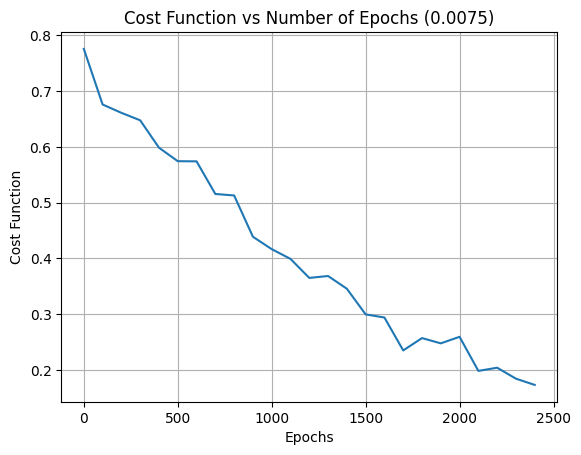

In [22]:
parameters, costs = model.fit(train_x, train_y, plot_cost_function=True)

In [11]:
pred_train = model.predict(train_x, train_y)

NameError: name 'train_x' is not defined

## 4. Inference

In [12]:
pred_test = model.predict(test_x, test_y)

NameError: name 'test_x' is not defined

In [13]:
my_image = "my_image.jpg" # change this to the name of your image file
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
num_px = 64

fname = "../data/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = model.predict(image, my_label_y)

print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

NameError: name 'np' is not defined